<font size = '5' color='blue'> 2.2 Supervised Learning- Start from linear Regression to Various Regression </font>

<style>
table td {
    padding: 0;
}
</style>

If we have $p$ features: $X=[x_{1}, x_{2}, \ldots x_{p}]$ with $n$ samples <br>
and there exists a linear function with parames: $\Theta=\left\{\theta_{0}, \theta_{1}, \theta_{2}, \ldots \theta_{p}\right\}$

\begin{alignat}{1}
\hat{y} = \theta_{0} + \theta_{1} x_{1}+\theta_{2} x_{2}+\ldots+\theta_{p} x_{p}. \tag{1}
\end{alignat}

such that we have
\begin{equation}
\hat{y} = h_{\theta} (X) = \Theta^T X. \tag{2}
\end{equation} 
The question is how to derive $\Theta$ when the dimensions of X are large or there is no existence of $(X^T \cdot X)^{-1}$

---

<font size = '4' color='blue'> Brief of Gradient Descent- </font><br>
    A Gradient Descent is a famous machine learning and deep learning optimization technique.
    
    The primary purpose of gradient descent is to minimize the cost function. The cost function is a method to determine the error between the actual and predicted output.

As in neural networks, the main goal is to predict the output, similar to the actual output. 
    
To check the difference between the actual output (y) and the predicted output( $\hat{y}$), we calculate the cost function. 
The formula of the cost function is-

<div>
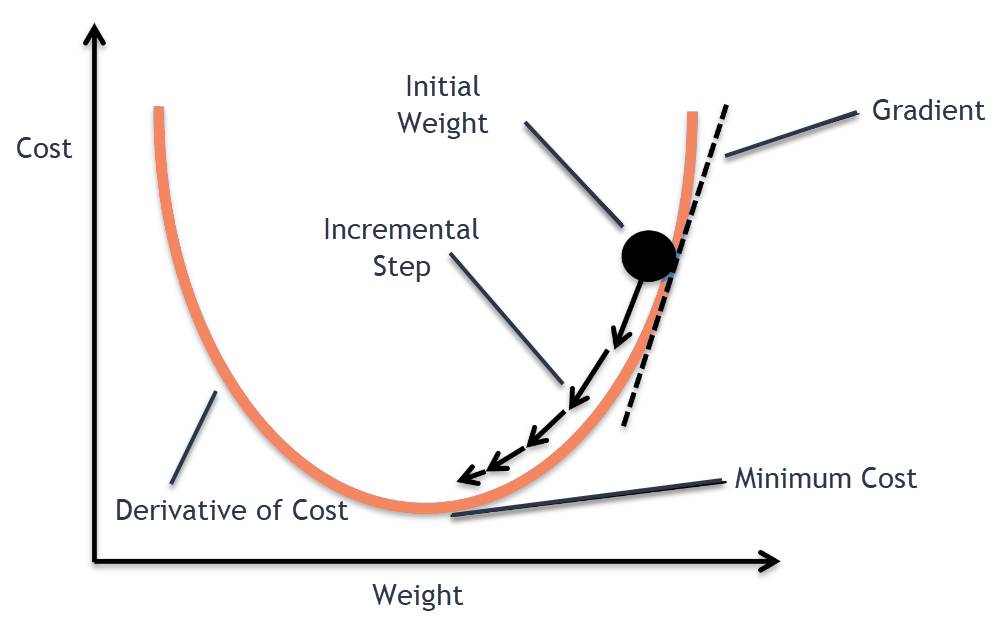
</div>

\begin{equation}
\text{MSE} (X, h_{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n} \sum_{i=1}^{n} (\theta^T \cdot x^{(i)} - y^{(i)})^2. \tag{3}
\end{equation}

where the lower the cost function, the predicted output is closer to the actual output. So, to minimize this cost function we use Gradient Descent.

Gradient Descent is of three types-

    1. Stochastic Gradient Descent.
    2. Batch Gradient Descent.
    3. Mini-Batch Gradient Descent.

The Normal Equation computes the inverse of $X^T · X$, which is an n × n matrix
(where n is the number of features). The computational complexity of inverting such a
matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation). <br>

On the positive side, this equation is linear with regards to the number of instances in
the training set (it is $O(m)$), so it handles large training sets efficiently, provided they
can fit in memory. <br>
Also, once you have trained your Linear Regression model (using the Normal Equation
or any other algorithm), predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will just take roughly twice as much time.

<font size = '4' color='blue'> Gradient Descent (梯度下降法), Stochastic Gradient Descent （隨機梯度下降法） </font>

We must learn some model parameters, such as feature weights and bias terms, to train a Linear Regression model. 
An approach to do the same is Gradient Descent, which is an iterative optimization algorithm capable of tweaking the model parameters by minimizing the cost function over the train data. 
It is a complete algorithm, i.e., it is guaranteed to find the global minimum (optimal solution), given there is enough time and the learning rate is not very high. 

Two Important Gradient Descent variants, widely used in Linear Regression and Neural networks, are Batch Gradient Descent and Stochastic Gradient Descent(SGD). 

    Batch Gradient Descent: Batch Gradient Descent involves calculations over the entire training set at each step, which is very slow on extensive training data. 

    Thus, it becomes very computationally expensive to do Batch GD. 
However, this is great for convex or relatively smooth error manifolds. 
Also, Batch GD scales well with the number of features.

\begin{alignat}{2}
\frac{\partial }{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n} (\theta^T \cdot X^{(i)} - y^{i})X_j^{(i)}. j=1,...,p\tag{4} 
\end{alignat}

\begin{alignat}{3}
\nabla \text{MSE}(\theta) = \left[\begin{array}{c}  
\dfrac{\partial }{\partial \theta_1}\text{MSE}(\theta)\\
\dfrac{\partial }{\partial \theta_2}\text{MSE}(\theta)\\
\vdots \\
\dfrac{\partial }{\partial \theta_p}MSE(\theta) 
\end{array}\right] = \frac{1}{n} X^T \cdot (X \cdot \theta - y) .  \tag{5}
\end{alignat}

gradient equation 
\begin{alignat}{3}
\theta ^{\text {next step}} = \theta - \eta  \nabla \text{MSE}(\theta). . \tag{6} 
\end{alignat}

In [1]:
# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

---

<font size = '4' color='blue'> Linear regression using batch gradient descent </font>

In [2]:
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

In [3]:
import numpy.linalg as LA
# using normal equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [6]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "g.")  # raw data
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10: 
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" #  red: inital state, blue: iterated states
            plt.plot(X_new, y_predict, style) 
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # derive an updated gradient
        theta = theta - eta * gradients                 # estimate a new theta with a fixed learning rate (eta)

        if theta_path is not None:
            theta_path.append(theta)  # record theta updates
            
    plt.xlabel("$x_1$", fontsize=12)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=12)

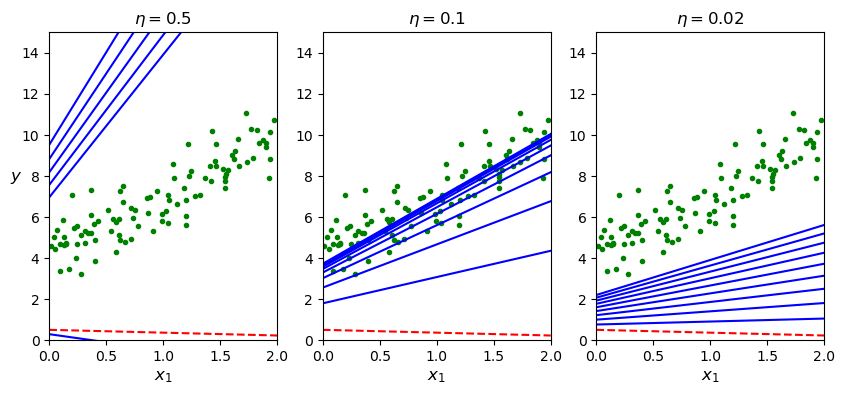

In [7]:
rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.5)  # learning rate (eta = 0.5)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.02)

plt.show()

From the Figures, we can find that the learning rates (eta) control the speeds of the error descent.

---

<font size = '4' color='blue'> Stochastic Gradient Descent </font>

In [8]:
theta_path_sgd = []

n_iterations = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

def learning_schedule(t): # modify the learning rate 
    return t0 / (t + t1)

m = len(X_b)

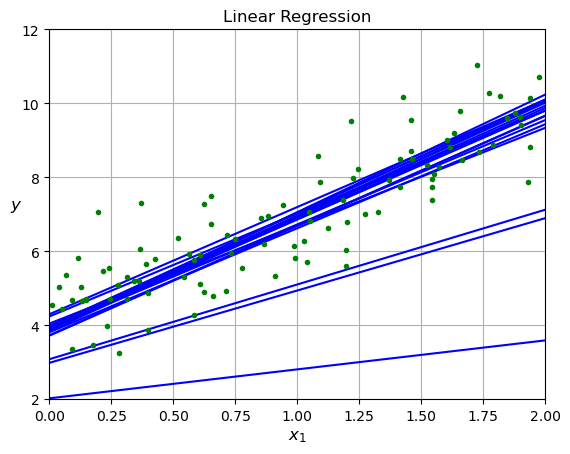

In [9]:
for epoch in range(n_iterations):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        random_index = rnd.randint(m)
        xi = X_b[random_index:random_index+1]        # get a random X
        yi = y[random_index:random_index+1]          # get the corresponding Y
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # derive an updated gradient
        eta = learning_schedule(epoch * m + i)       # update the eta
        
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.title('Linear Regression')
plt.plot(X, y, "g.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([0, 2, 2, 12])
plt.grid(); plt.show()

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

隨機梯度下降分類
loss function（損失函數） 可以通過 loss 參數來設置。 SGDClassifier 支持以下的 loss functions（損失函數）：

    loss=”hinge”: (soft-margin) linear Support Vector Machine （（軟-間隔）線性支持向量機），
    loss=”modified_huber”: smoothed hinge loss （平滑的 hinge 損失），
    loss=”log”: logistic regression （logistic 迴歸），

        and all regression losses below（以及所有的迴歸損失）。

懲罰方法可以通過 penalty 參數來設定。 SGD 支持以下 penalties（懲罰）:

    penalty=”l2”: L2 norm penalty on coef_.
    penalty=”l1”: L1 norm penalty on coef_.
    penalty=”elasticnet”: Convex combination of L2 and L1（L2 型和 L1 型的凸組合）; (1 - l1_ratio) * L2 + l1_ratio * L1.
        
預設爲 penalty=”l2” 。 L1 penalty （懲罰）導致稀疏解，使得大多數係數爲零。 Elastic Net（彈性網）解決了在特徵高相關時 L1 penalty（懲罰）的一些不足。參數 l1_ratio 控制了 L1 和 L2 penalty（懲罰）的 convex combination （凸組合）。

---

<font size = '4' color='blue'> Mini-batch gradient descent </font>

In [12]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = rnd.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]    # get a mini-batch of X
        yi = y_shuffled[i:i+minibatch_size]      # get the corresponding of Y
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # derive an updated gradient
        eta = learning_schedule(t)
        
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [13]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

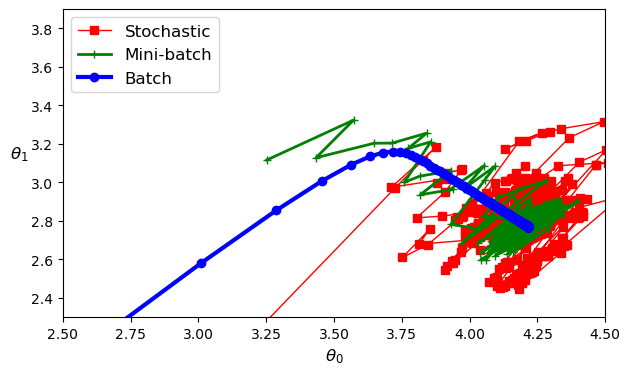

In [14]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=12)
plt.ylabel(r"$\theta_1$   ", fontsize=12, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Question: Which one is the best?

---

<font size = '4' color='blue'> Polynomial regression </font>

Let an output $(y)$ is a polynomial regression of $x_1$ 
\begin{alignat}{1}
\hat{y} = \theta_{0} + \theta_{1} x_{1}+\theta_{2} x_{1}^2+\ldots+\theta_{p} x_{1}^p. \tag{7}
\end{alignat}

In [57]:
import numpy as np
import numpy.random as rnd

rnd.seed(40)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

In [58]:
X.shape

(100, 1)

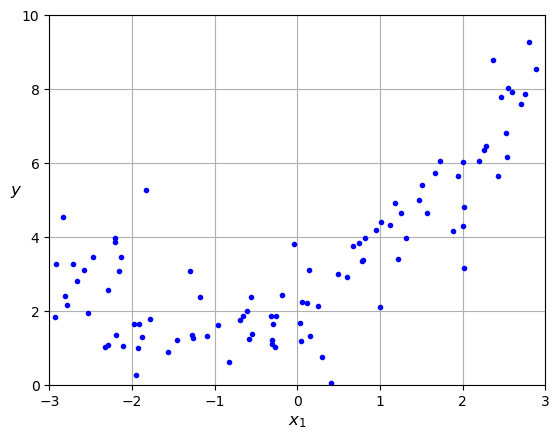

In [59]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.grid();plt.show()

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.55387783])

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0121911]), array([[0.95469633, 0.4696792 ]]))

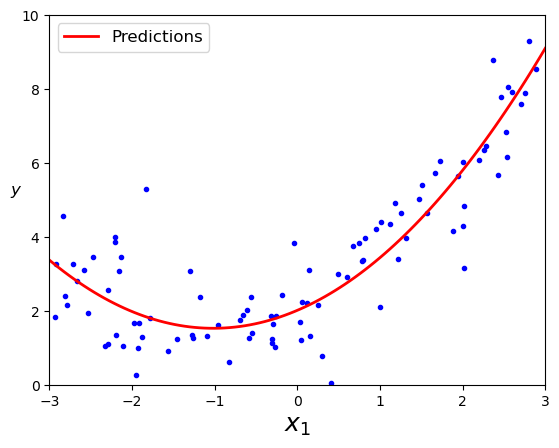

In [62]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.show()

The model estimates $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$ when in fact the original
function was $y = 0.5x_1^2 + 1.0x_1 + 2.0$ + Gaussian noise. <br>

Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree.

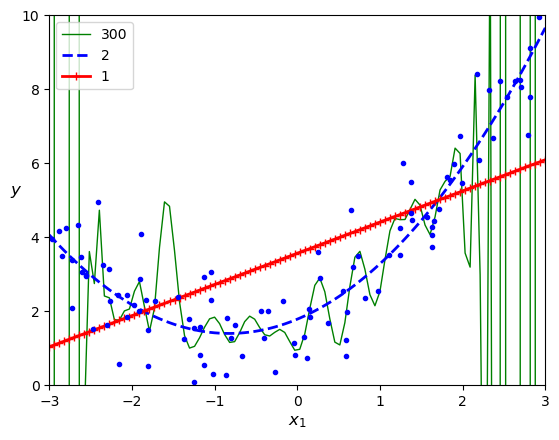

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ))
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.show()

This high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. <br>

The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated
using a quadratic model, but in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?

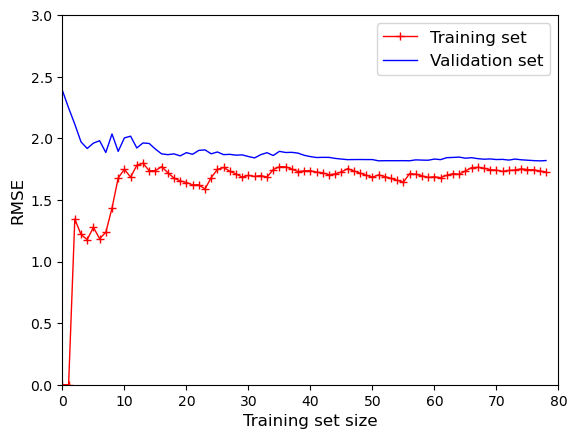

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="Validation set")
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("RMSE", fontsize=12)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

First, let’s look at the performance on the training data: <br>
when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data perfectly,
both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances
to the training set doesn’t make the average error much better or worse. <br>

Now let’s look at the performance of the model on the validation data. When the model is
trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve. <br>

These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.

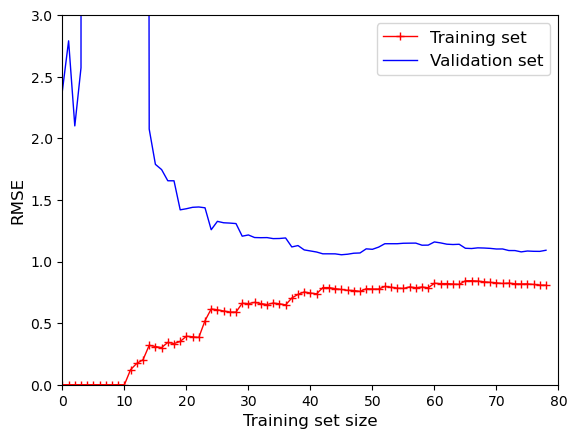

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

These learning curves look a bit like the previous ones, but there are two very important differences:<br>
    * The error on the training data is much lower than with the Linear Regression model. <br>
    * There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark
of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

---

<font size = '5' color='blue'> Regularized models </font><br>
A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.<br>

For a linear model, regularization is typically achieved by constraining the model's weights. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

\begin{alignat}{3}
J(\theta) = (1-\lambda_1-\lambda_2)\text{MSE} (\theta) + \lambda_1 \sum_{i=1}^{p} \lvert \theta_i \rvert + \lambda_2 \sum_{i=1}^{p} \theta_i^2. \tag{8} 
\end{alignat}
where<br>
$\lambda_1$: weight of norm 1 of $\theta_i$. <br>
$\lambda_2$: weight of norm 2 of $\theta_i$.

In [63]:
from sklearn.linear_model import Ridge

rnd.seed(42)
m = 40
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [64]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("$x_1$", fontsize=12)
    plt.axis([0, 3, 0, 4])

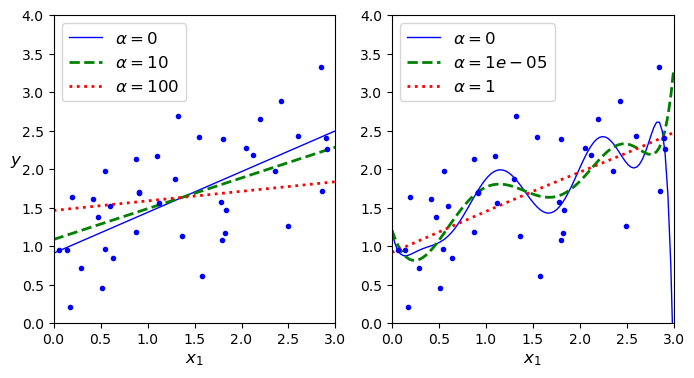

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))

plt.show()

---

<font size = '5' color='blue'>  Ridge Regression (also called Tikhonov regularization) </font>

It is a regularized version of Linear Regression: a regularization term equal to $α \sum_{i=1}^{n} \theta_i^2 $ is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

Ridge Regression cost function
\begin{equation}
\begin{split}
J_2 (\theta) &= \text{MSE} (\theta) + \lambda_2 \sum_{i=0}^{p} \theta_i^2.\\
                    &= \frac{1}{2n} \left[   \sum_{i=i}^{n} (h(x_i) - y_i)^2 + \lambda_2 \sum_{i=0}^{p} \theta_i^2 \right]
\end{split}\tag{9} 
\end{equation}

It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models. 

In [26]:
# Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution
#(a variant of Equation 4-9 using a matrix factorization technique by André-Louis Cholesky):
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge Regression.

In [27]:
#And using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2", random_state=41)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46684603])

In [28]:
ridge_reg = Ridge(alpha=1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071315]])

---

<font size = '5' color='blue'> Lasso Regression </font>

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

Lasso Regression cost function $J_1$
\begin{alignat}{3}
J_1(\theta) = \text{MSE} (\theta) + \lambda_1 \sum_{i=0}^{p} \lvert \theta_i \rvert. \tag{10} 
\end{alignat}

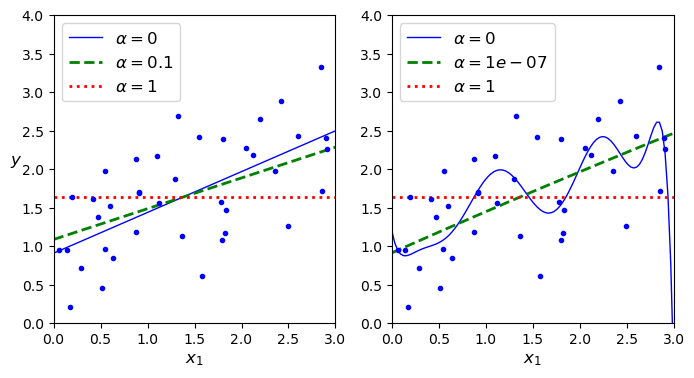

In [67]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1)
plt.show()

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [31]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

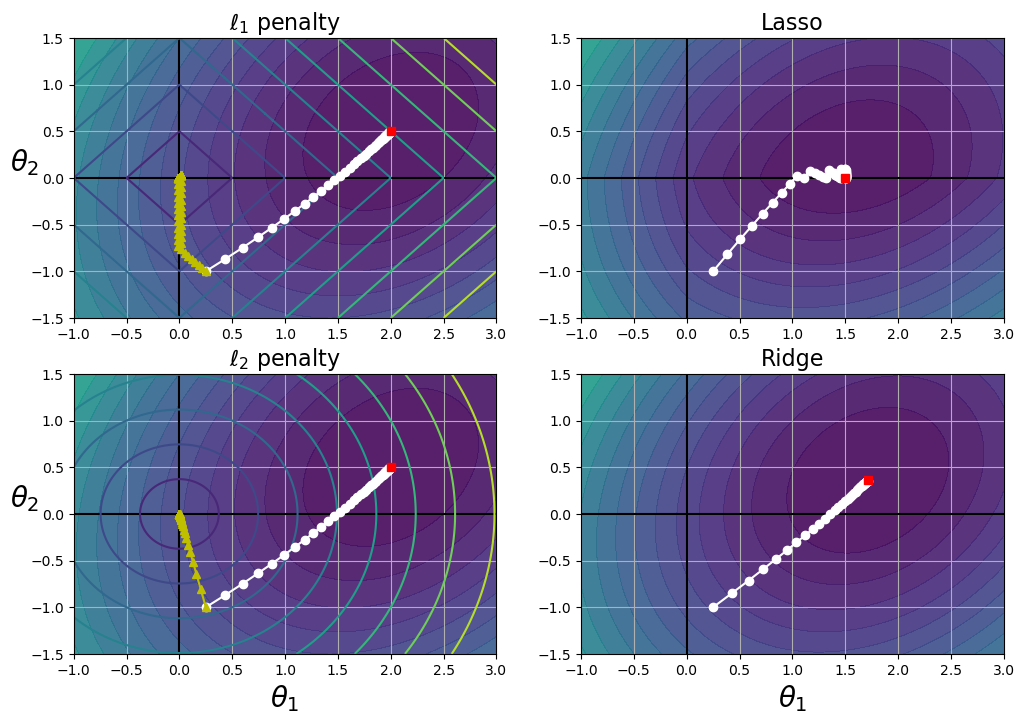

In [32]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

On the top-left plot, the background contours (ellipses) represent an unregularized MSE cost function
(α = 0), and the white circles show the Batch Gradient Descent path with that cost function. The foreground contours (diamonds) represent the ℓ1 penalty, and the
triangles show the BGD path for this penalty only (α → ∞).<br>

Notice how the path first reaches $θ_1 = 0$, then rolls down a gutter until it reaches $θ_2$ = 0. <br>

On the top-right plot, the contours represent the same cost function plus an ℓ1 penalty with α = 0.5. 
The global minimum is on the $θ_2 = 0$ axis. BGD first reaches $θ_2 = 0$, then rolls down the gutter until it reaches the global minimum. The two bottom plots show the same
thing but uses an ℓ2 penalty instead. 
The regularized minimum is closer to θ = 0 than the unregularized minimum, but the weights do not get fully eliminated.

---

<font size = '5' color='blue'> Elastic Net </font>

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

Elastic Net cost function
\begin{alignat}{3}
J_{EN}(\theta) = \text{MSE} (\theta) + \gamma \alpha \sum_{i=0}^{p} \lvert \theta_i \rvert + \frac{1-\gamma}{2} \alpha \sum_{i=0}^{p} \theta_i^2. \tag{11} 
\end{alignat}

In [33]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? 

It is almost always preferable to have at least a little bit of regularization, so generally you should
avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero as we have discussed. 

In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number
of features is greater than the number of training instances or when several features are strongly correlated.

---

<font size = '5' color='blue'> Early Stopping </font>

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.

As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is
such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

In [34]:
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [35]:
sgd_reg = SGDRegressor(max_iter=100,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


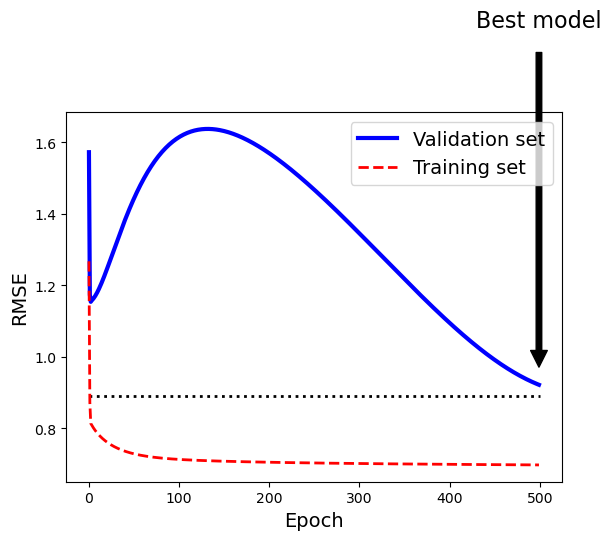

In [36]:
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

---

<font size = '5' color='blue'> Logistic regression </font>

Some regression algorithms can also be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). 

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

Logistic Regression model estimated probability (vectorized form)
\begin{alignat}{3}
\hat{p} = h_\theta(x) = \sigma(\theta^T \cdot X). \tag{12} 
\end{alignat}

Once the Logistic Regression model has estimated the probability p = hθ(x) that an instance x belongs to the positive class, it can make its prediction ŷ easily.

Logistic function 
\begin{alignat}{3}
\sigma(t) = \frac{1}{1+\exp^{-t}}. \tag{13} 
\end{alignat}

Logistic Regression cost function (log loss)
\begin{alignat}{3}
J_{LR}(\theta) = -\frac{1}{n} \sum_{i=1}^{n} [ y^{(i)} \log (\hat{p} ^{(i)}) + (1-y^{(i)}) \log (1- \hat{p}^{(i)})]. \tag{14} 
\end{alignat}

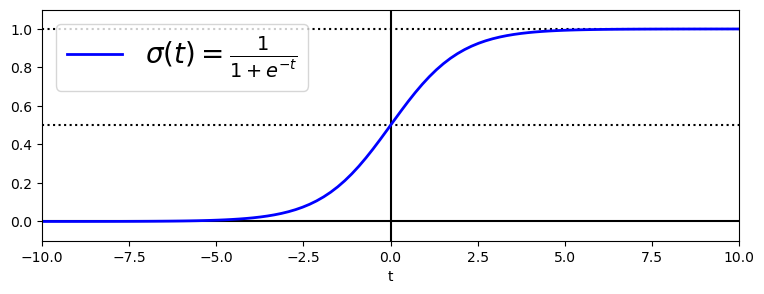

In [37]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [39]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

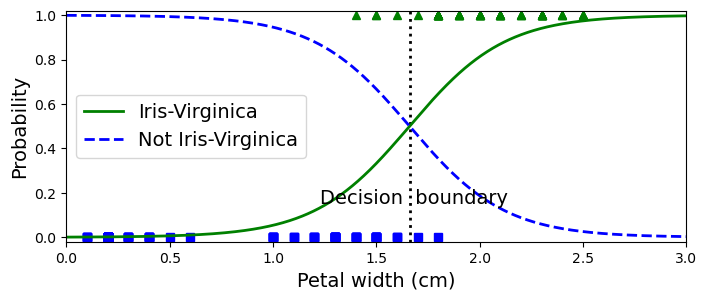

In [40]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
#plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [41]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

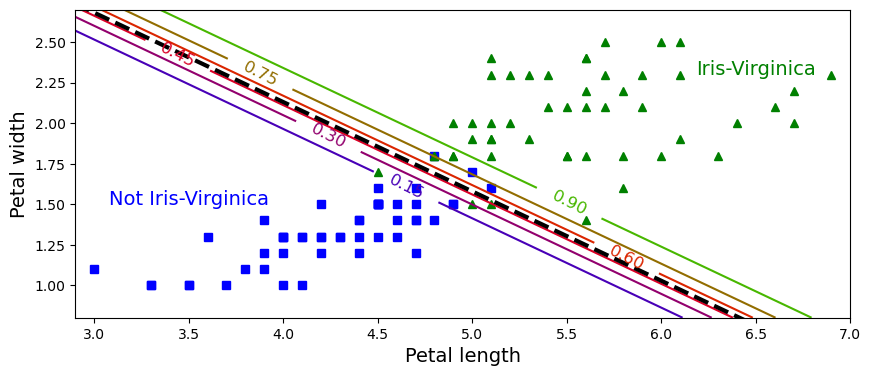

In [42]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(C=10**10)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\hao\AppData\Local\Temp\ipykernel_19924\1723108910.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)


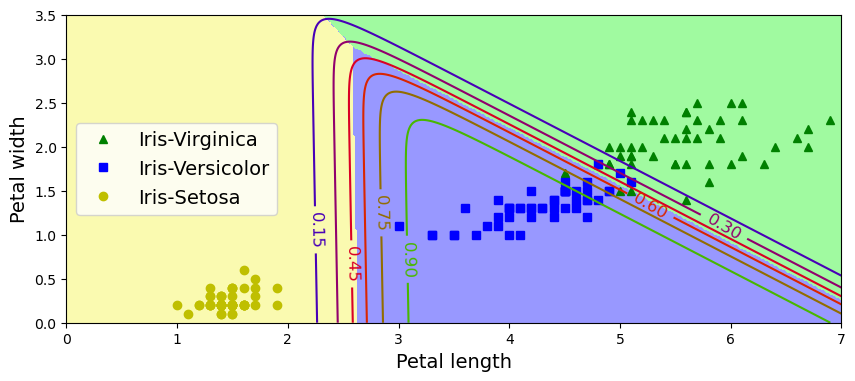

In [43]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [44]:
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626371e-07, 5.73689802e-02, 9.42630398e-01]])